In [3]:
from adapters.load import raw

2025-10-29 10:22:49.323 | DEBUG    | src.config:<module>:11 - PROJ_ROOT path is: /home/rcc/Projects/salepricepredictor


In [4]:
df = raw()
print(f"Shape: {df.shape}")
print(f"Columns: {df.columns.tolist()[:10]}...")  # First 10
df.head()

Shape: (1460, 81)
Columns: ['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities']...


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000


In [5]:
# non-na values
for name, value in sorted(zip(df.notna().sum().index, df.notna().sum()), key=lambda x: x[1]):
    print(f"{name}: {value}")

PoolQC: 7
MiscFeature: 54
Alley: 91
Fence: 281
FireplaceQu: 770
LotFrontage: 1201
GarageType: 1379
GarageYrBlt: 1379
GarageFinish: 1379
GarageQual: 1379
GarageCond: 1379
BsmtExposure: 1422
BsmtFinType2: 1422
BsmtQual: 1423
BsmtCond: 1423
BsmtFinType1: 1423
MasVnrType: 1452
MasVnrArea: 1452
Electrical: 1459
Id: 1460
MSSubClass: 1460
MSZoning: 1460
LotArea: 1460
Street: 1460
LotShape: 1460
LandContour: 1460
Utilities: 1460
LotConfig: 1460
LandSlope: 1460
Neighborhood: 1460
Condition1: 1460
Condition2: 1460
BldgType: 1460
HouseStyle: 1460
OverallQual: 1460
OverallCond: 1460
YearBuilt: 1460
YearRemodAdd: 1460
RoofStyle: 1460
RoofMatl: 1460
Exterior1st: 1460
Exterior2nd: 1460
ExterQual: 1460
ExterCond: 1460
Foundation: 1460
BsmtFinSF1: 1460
BsmtFinSF2: 1460
BsmtUnfSF: 1460
TotalBsmtSF: 1460
Heating: 1460
HeatingQC: 1460
CentralAir: 1460
1stFlrSF: 1460
2ndFlrSF: 1460
LowQualFinSF: 1460
GrLivArea: 1460
BsmtFullBath: 1460
BsmtHalfBath: 1460
FullBath: 1460
HalfBath: 1460
BedroomAbvGr: 1460
Kitc

In [6]:
# non-na values
for name, value in sorted(zip(df.notna().sum().index, df.notna().sum()), key=lambda x: x[1]):
    if (ratio := value / df.shape[0]) < 1:
        print(f"{name}: {ratio}")

PoolQC: 0.004794520547945206
MiscFeature: 0.036986301369863014
Alley: 0.06232876712328767
Fence: 0.19246575342465752
FireplaceQu: 0.5273972602739726
LotFrontage: 0.8226027397260274
GarageType: 0.9445205479452055
GarageYrBlt: 0.9445205479452055
GarageFinish: 0.9445205479452055
GarageQual: 0.9445205479452055
GarageCond: 0.9445205479452055
BsmtExposure: 0.9739726027397261
BsmtFinType2: 0.9739726027397261
BsmtQual: 0.9746575342465753
BsmtCond: 0.9746575342465753
BsmtFinType1: 0.9746575342465753
MasVnrType: 0.9945205479452055
MasVnrArea: 0.9945205479452055
Electrical: 0.9993150684931507


In [7]:
weak_columns = [
    "PoolQC",
    "MiscFeature",
    "Alley",
    "Fence",
    "FireplaceQu",
    "LotFrontage",
]

for column in weak_columns:
    print(column, ":", df[column].unique())

PoolQC : [None 'Ex' 'Fa' 'Gd']
MiscFeature : [None 'Shed' 'Gar2' 'Othr' 'TenC']
Alley : [None 'Grvl' 'Pave']
Fence : [None 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']
FireplaceQu : [None 'TA' 'Gd' 'Fa' 'Ex' 'Po']
LotFrontage : [ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39.
 144. 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.]


Categorical columns: ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu']
Numerical columns: ['LotFrontage']


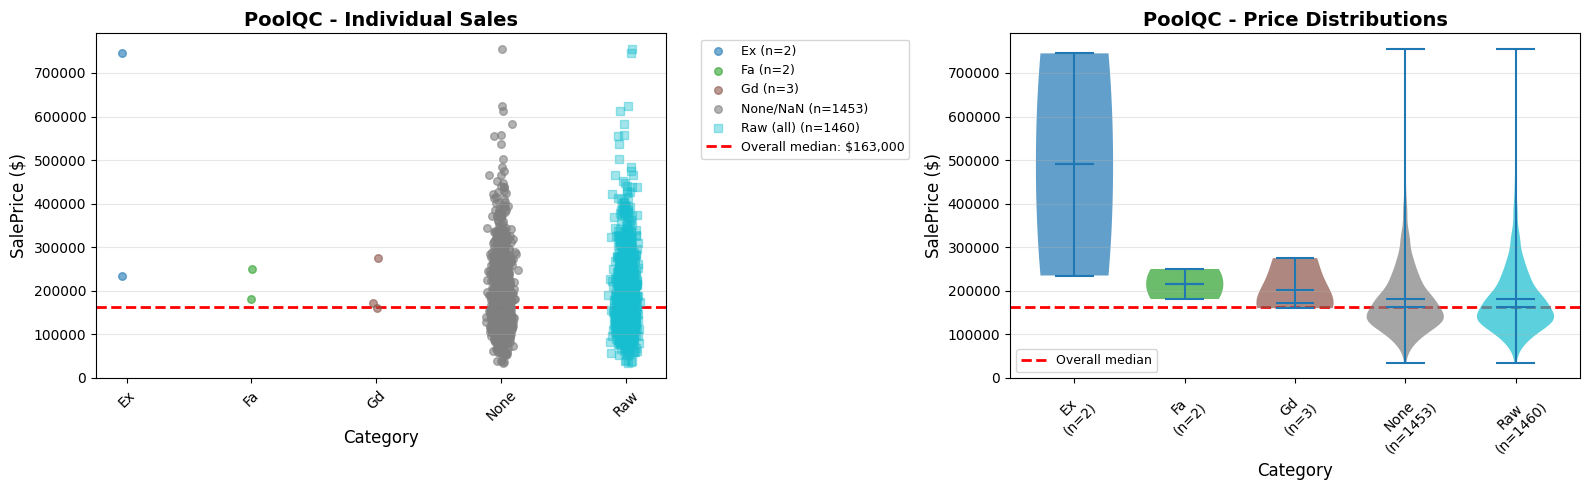

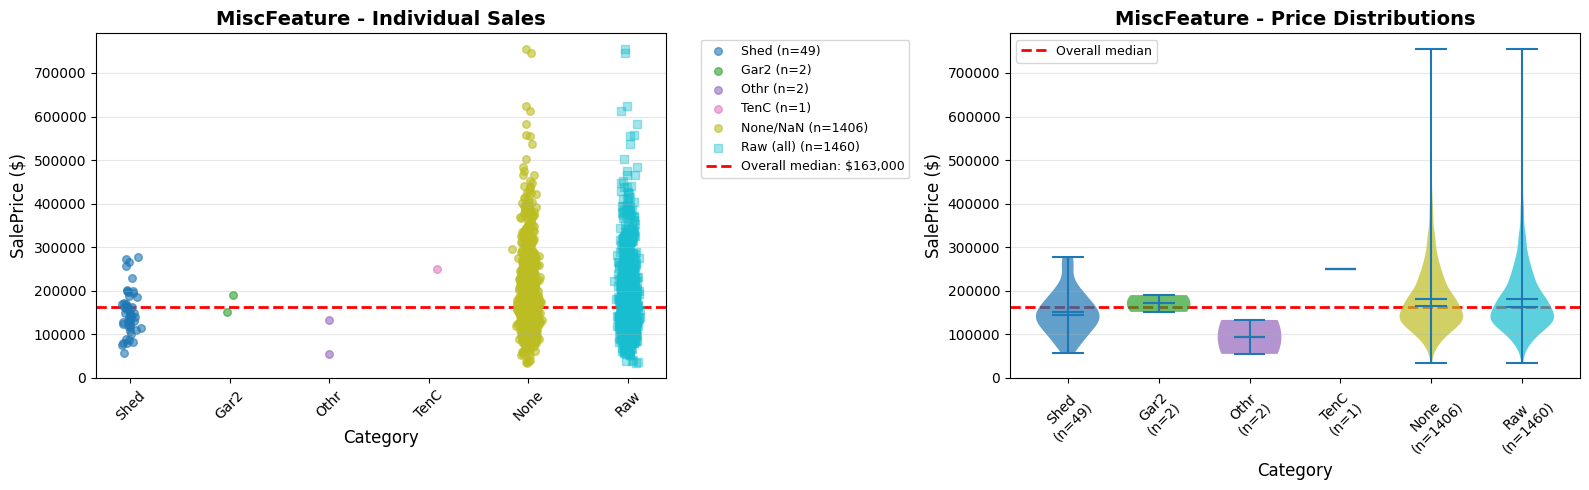

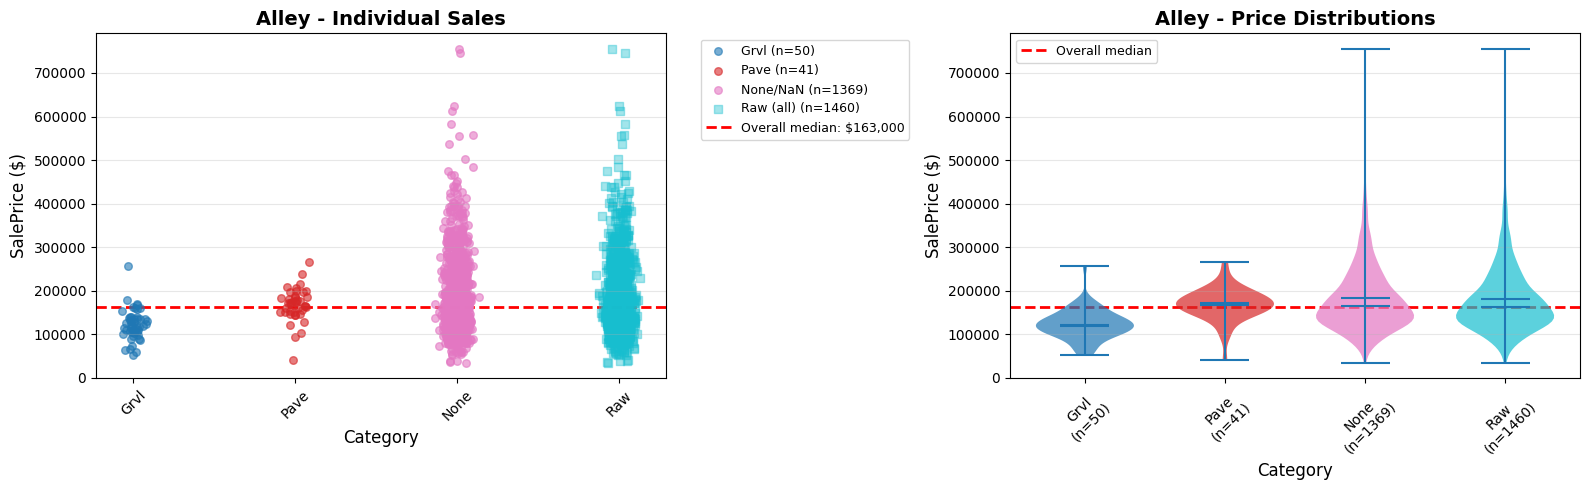

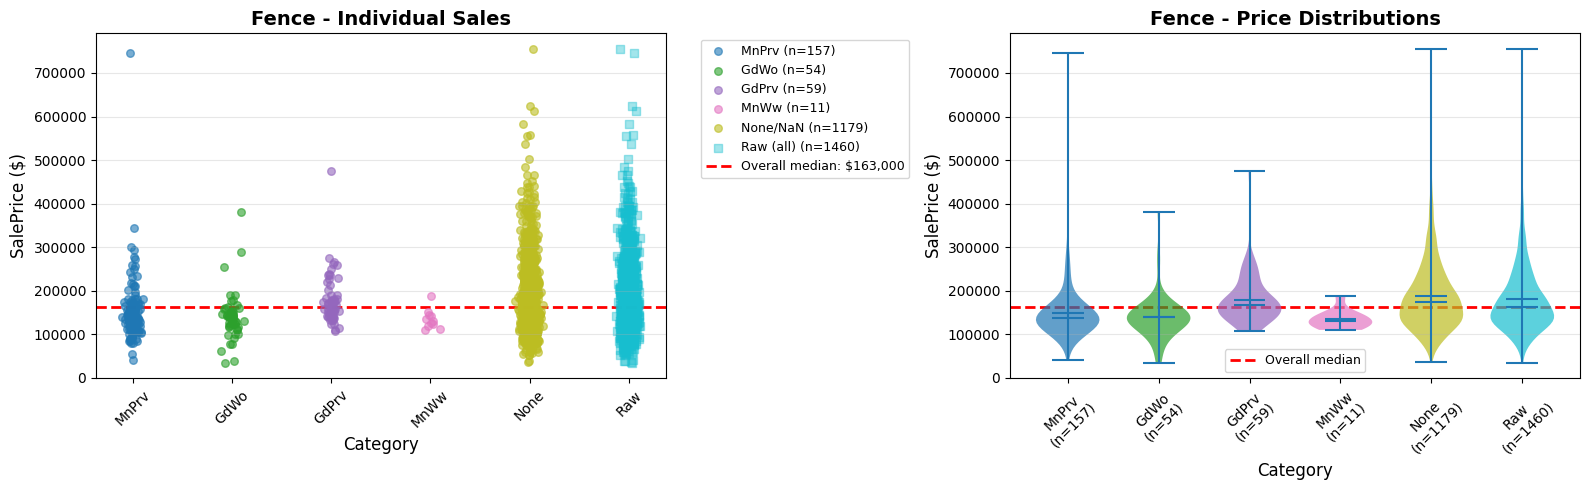

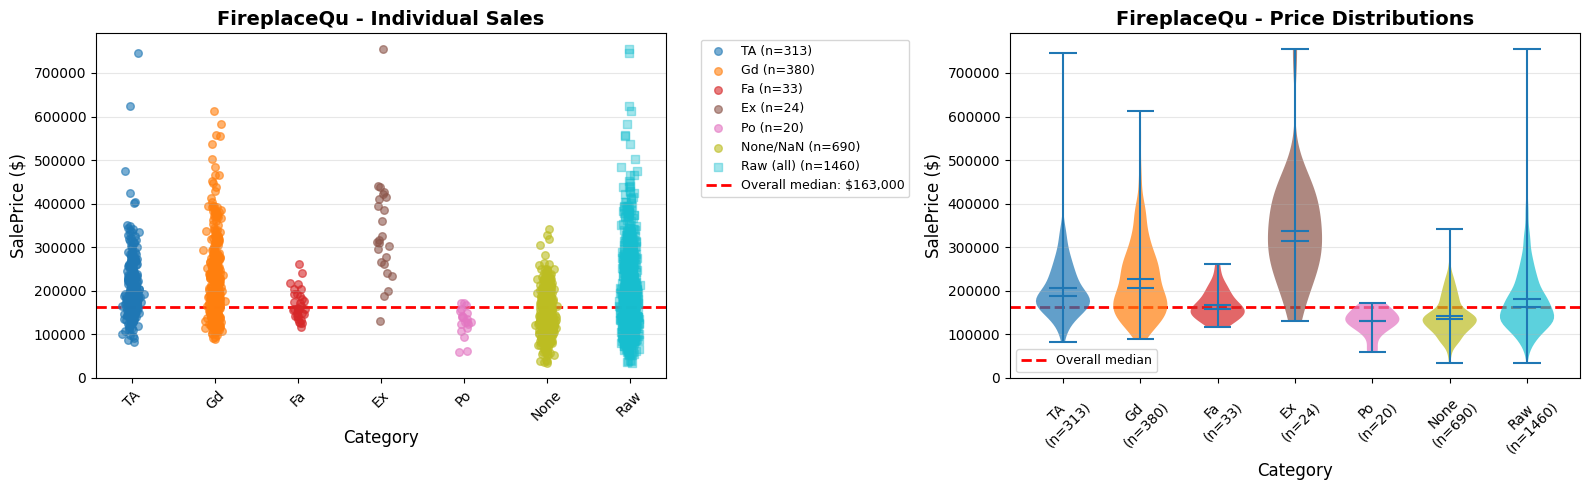

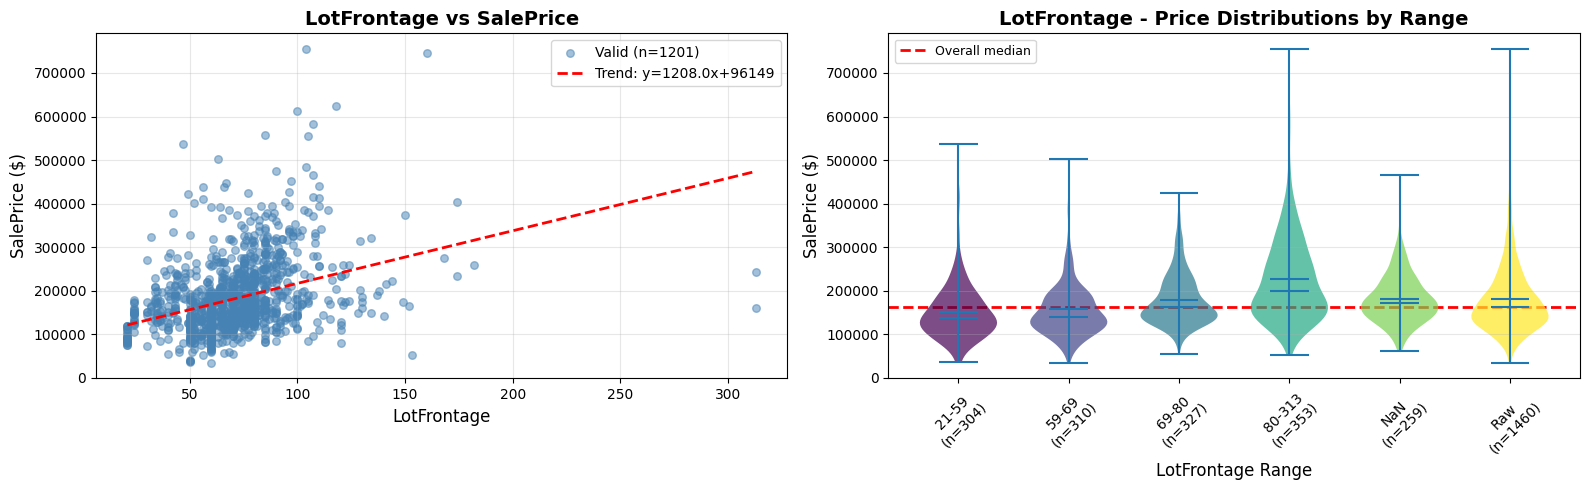


SUMMARY: SalePrice Statistics by Column Value

PoolQC:
------------------------------------------------------------
  NaN             (n=1453): Median=$  162,900 (  -0.1%), Mean=$  180,405, Range=$ 34,900-$755,000
  Gd              (n=   3): Median=$  171,000 (  +4.9%), Mean=$  201,990, Range=$160,000-$274,970
  Fa              (n=   2): Median=$  215,500 ( +32.2%), Mean=$  215,500, Range=$181,000-$250,000
  Ex              (n=   2): Median=$  490,000 (+200.6%), Mean=$  490,000, Range=$235,000-$745,000
  OVERALL         (n=1460): Median=$  163,000

MiscFeature:
------------------------------------------------------------
  Othr            (n=   2): Median=$   94,000 ( -42.3%), Mean=$   94,000, Range=$ 55,000-$133,000
  Shed            (n=  49): Median=$  144,000 ( -11.7%), Mean=$  151,188, Range=$ 55,993-$277,000
  NaN             (n=1406): Median=$  164,250 (  +0.8%), Mean=$  182,046, Range=$ 34,900-$755,000
  Gar2            (n=   2): Median=$  170,750 (  +4.8%), Mean=$  170,750, Ra

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Identify categorical vs numerical columns
categorical_weak = []
numerical_weak = []

for col in weak_columns:
    if df[col].dtype in ["object", "category"] or col in [
        "PoolQC",
        "MiscFeature",
        "Alley",
        "Fence",
        "FireplaceQu",
    ]:
        categorical_weak.append(col)
    else:
        numerical_weak.append(col)

print(f"Categorical columns: {categorical_weak}")
print(f"Numerical columns: {numerical_weak}")

# Plot categorical features
for column in categorical_weak:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))

    # Get unique values
    unique_vals = [v for v in df[column].unique() if pd.notna(v)] + [np.nan]
    colors = plt.cm.tab10(np.linspace(0, 1, len(unique_vals) + 1))

    # Left plot: Scatter plot with jitter
    overall_median = df["SalePrice"].median()

    for i, val in enumerate(unique_vals):
        if pd.isna(val):
            mask = df[column].isna()
            label = "None/NaN"
        else:
            mask = df[column] == val
            label = str(val)

        prices = df[mask]["SalePrice"].values
        # Add jitter to x-axis
        x_jitter = np.random.normal(i, 0.04, size=len(prices))

        ax1.scatter(
            x_jitter, prices, alpha=0.6, s=30, c=[colors[i]], label=f"{label} (n={len(prices)})"
        )

    # Add "raw" category - all data points
    all_prices = df["SalePrice"].values
    x_jitter_raw = np.random.normal(len(unique_vals), 0.04, size=len(all_prices))
    ax1.scatter(
        x_jitter_raw,
        all_prices,
        alpha=0.4,
        s=30,
        c=[colors[-1]],
        label=f"Raw (all) (n={len(all_prices)})",
        marker="s",
    )

    ax1.axhline(
        y=overall_median,
        color="red",
        linestyle="--",
        linewidth=2,
        label=f"Overall median: ${overall_median:,.0f}",
        zorder=0,
    )
    ax1.set_ylabel("SalePrice ($)", fontsize=12)
    ax1.set_xlabel("Category", fontsize=12)
    ax1.set_title(f"{column} - Individual Sales", fontsize=14, fontweight="bold")
    ax1.set_xticks(range(len(unique_vals) + 1))
    ax1.set_xticklabels(
        [str(v) if pd.notna(v) else "None" for v in unique_vals] + ["Raw"], rotation=45
    )
    ax1.legend(bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=9)
    ax1.grid(axis="y", alpha=0.3)

    # Right plot: Distribution (violin plot)
    data_to_plot = []
    labels_plot = []

    for val in unique_vals:
        if pd.isna(val):
            mask = df[column].isna()
            label = "None"
        else:
            mask = df[column] == val
            label = str(val)

        prices = df[mask]["SalePrice"].values
        data_to_plot.append(prices)
        labels_plot.append(f"{label}\n(n={len(prices)})")

    # Add "raw" category
    data_to_plot.append(all_prices)
    labels_plot.append(f"Raw\n(n={len(all_prices)})")

    parts = ax2.violinplot(
        data_to_plot,
        positions=range(len(data_to_plot)),
        showmeans=True,
        showmedians=True,
        widths=0.7,
    )

    # Color violin plots
    for i, pc in enumerate(parts["bodies"]):
        pc.set_facecolor(colors[i])
        pc.set_alpha(0.7)

    ax2.axhline(
        y=overall_median,
        color="red",
        linestyle="--",
        linewidth=2,
        label="Overall median",
        zorder=0,
    )
    ax2.set_ylabel("SalePrice ($)", fontsize=12)
    ax2.set_xlabel("Category", fontsize=12)
    ax2.set_title(f"{column} - Price Distributions", fontsize=14, fontweight="bold")
    ax2.set_xticks(range(len(data_to_plot)))
    ax2.set_xticklabels(labels_plot, rotation=45)
    ax2.legend(fontsize=9)
    ax2.grid(axis="y", alpha=0.3)

    plt.tight_layout()
    plt.show()

# Plot numerical features
for column in numerical_weak:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))

    # Remove NaN for plotting
    mask_valid = df[column].notna()
    x_data = df[mask_valid][column].values
    y_data = df[mask_valid]["SalePrice"].values

    mask_nan = df[column].isna()
    prices_nan = df[mask_nan]["SalePrice"].values

    # Left plot: Scatter plot of feature vs SalePrice
    ax1.scatter(x_data, y_data, alpha=0.5, s=30, c="steelblue", label=f"Valid (n={len(x_data)})")

    # Add regression line
    z = np.polyfit(x_data, y_data, 1)
    p = np.poly1d(z)
    ax1.plot(
        sorted(x_data),
        p(sorted(x_data)),
        "r--",
        linewidth=2,
        label=f"Trend: y={z[0]:.1f}x+{z[1]:.0f}",
    )

    ax1.set_xlabel(f"{column}", fontsize=12)
    ax1.set_ylabel("SalePrice ($)", fontsize=12)
    ax1.set_title(f"{column} vs SalePrice", fontsize=14, fontweight="bold")
    ax1.legend()
    ax1.grid(alpha=0.3)

    # Right plot: Distribution comparison
    # Create bins for the numerical feature
    n_bins = 4
    bins = pd.qcut(df[mask_valid][column], q=n_bins, duplicates="drop")
    bin_labels = bins.unique().categories

    data_to_plot = []
    labels_plot = []

    for bin_label in bin_labels:
        mask_bin = (df[column] >= bin_label.left) & (df[column] <= bin_label.right)
        prices = df[mask_bin]["SalePrice"].values
        data_to_plot.append(prices)
        labels_plot.append(f"{bin_label.left:.0f}-{bin_label.right:.0f}\n(n={len(prices)})")

    # Add NaN category
    if len(prices_nan) > 0:
        data_to_plot.append(prices_nan)
        labels_plot.append(f"NaN\n(n={len(prices_nan)})")

    # Add "raw" category
    all_prices = df["SalePrice"].values
    data_to_plot.append(all_prices)
    labels_plot.append(f"Raw\n(n={len(all_prices)})")

    # Violin plot
    overall_median = df["SalePrice"].median()
    parts = ax2.violinplot(
        data_to_plot,
        positions=range(len(data_to_plot)),
        showmeans=True,
        showmedians=True,
        widths=0.7,
    )

    # Color violin plots
    colors = plt.cm.viridis(np.linspace(0, 1, len(data_to_plot)))
    for i, pc in enumerate(parts["bodies"]):
        pc.set_facecolor(colors[i])
        pc.set_alpha(0.7)

    ax2.axhline(
        y=overall_median,
        color="red",
        linestyle="--",
        linewidth=2,
        label="Overall median",
        zorder=0,
    )
    ax2.set_ylabel("SalePrice ($)", fontsize=12)
    ax2.set_xlabel(f"{column} Range", fontsize=12)
    ax2.set_title(f"{column} - Price Distributions by Range", fontsize=14, fontweight="bold")
    ax2.set_xticks(range(len(data_to_plot)))
    ax2.set_xticklabels(labels_plot, rotation=45)
    ax2.legend(fontsize=9)
    ax2.grid(axis="y", alpha=0.3)

    plt.tight_layout()
    plt.show()

# Print summary statistics
print("\n" + "=" * 80)
print("SUMMARY: SalePrice Statistics by Column Value")
print("=" * 80)

for column in weak_columns:
    print(f"\n{column}:")
    print("-" * 60)

    unique_vals = df[column].unique()
    stats = []

    for val in unique_vals:
        if pd.isna(val):
            mask = df[column].isna()
            label = "NaN"
        else:
            mask = df[column] == val
            label = str(val)

        prices = df[mask]["SalePrice"]
        stats.append(
            {
                "Value": label,
                "Count": len(prices),
                "Mean": prices.mean(),
                "Median": prices.median(),
                "Std": prices.std(),
                "Min": prices.min(),
                "Max": prices.max(),
            }
        )

    # Sort by median price
    stats = sorted(stats, key=lambda x: x["Median"])

    overall_median = df["SalePrice"].median()

    for s in stats:
        diff_from_overall = s["Median"] - overall_median
        pct_diff = (diff_from_overall / overall_median) * 100

        print(
            f"  {s['Value']:15s} (n={s['Count']:4d}): "
            f"Median=${s['Median']:>9,.0f} ({pct_diff:+6.1f}%), "
            f"Mean=${s['Mean']:>9,.0f}, "
            f"Range=${s['Min']:>7,.0f}-${s['Max']:>7,.0f}"
        )

    print(f"  {'OVERALL':15s} (n={len(df):4d}): Median=${overall_median:>9,.0f}")

# Results

- PoolQC: irrelevant, no trend, e.g., None = cheap, Ex = pricy
- MiscFeature: irrelevant, no trend, similarly distributed as prices
- Alley: irrelevant, no trend
- Fence: irrelevant, no trend
- FireplaceQu: Ex, TA and GD seems slightly higher in price -> maybe bin those categories into "Good", "Bad"?
- LotFrontage: a few outliers (e.g. around 300), but no trend visible, irrelevant

Thus: drop all of the six except FireplaceQu.


/tmp/ipykernel_31469/4149276714.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[column] = df[column].replace(


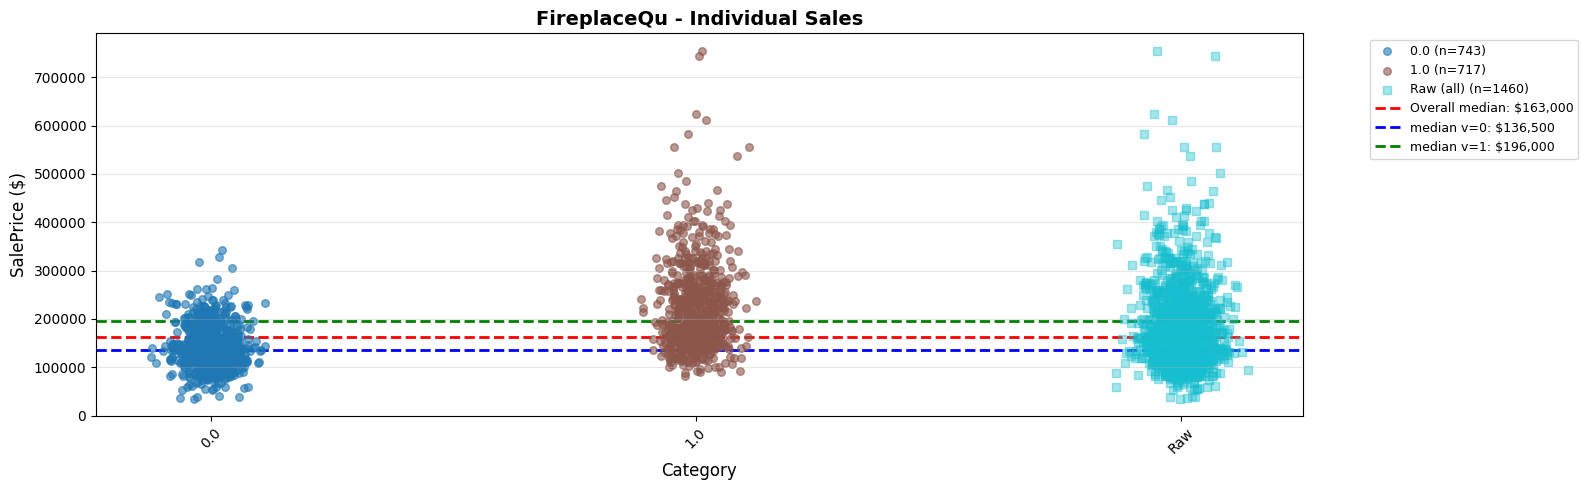

In [9]:
column = "FireplaceQu"
df[column] = df[column].replace(
    ["Ex", "TA", "Gd", "Fa", "Po", None, "None", np.nan], [1, 1, 1, 0, 0, 0, 0, 0]
)

fig, ax1 = plt.subplots(1, 1, figsize=(16, 5))

# Get unique values
unique_vals = [v for v in df[column].unique() if pd.notna(v)]
colors = plt.cm.tab10(np.linspace(0, 1, len(unique_vals) + 1))

for i, val in enumerate(unique_vals):
    mask = df[column] == val
    label = str(val)

    prices = df[mask]["SalePrice"].values
    # Add jitter to x-axis
    x_jitter = np.random.normal(i, 0.04, size=len(prices))

    ax1.scatter(
        x_jitter, prices, alpha=0.6, s=30, c=[colors[i]], label=f"{label} (n={len(prices)})"
    )

# Add "raw" category - all data points
all_prices = df["SalePrice"].values
x_jitter_raw = np.random.normal(len(unique_vals), 0.04, size=len(all_prices))
ax1.scatter(
    x_jitter_raw,
    all_prices,
    alpha=0.4,
    s=30,
    c=[colors[-1]],
    label=f"Raw (all) (n={len(all_prices)})",
    marker="s",
)

overall_median = df["SalePrice"].median()
ax1.axhline(
    y=overall_median,
    color="red",
    linestyle="--",
    linewidth=2,
    label=f"Overall median: ${overall_median:,.0f}",
    zorder=0,
)
zero_med = df.loc[df[column] == 0, "SalePrice"].median()
ax1.axhline(
    y=zero_med,
    color="blue",
    linestyle="--",
    linewidth=2,
    label=f"median v=0: ${zero_med:,.0f}",
    zorder=0,
)
one_med = df.loc[df[column] == 1, "SalePrice"].median()
ax1.axhline(
    y=one_med,
    color="green",
    linestyle="--",
    linewidth=2,
    label=f"median v=1: ${one_med:,.0f}",
    zorder=0,
)

ax1.set_ylabel("SalePrice ($)", fontsize=12)
ax1.set_xlabel("Category", fontsize=12)
ax1.set_title(f"{column} - Individual Sales", fontsize=14, fontweight="bold")
ax1.set_xticks(range(len(unique_vals) + 1))
ax1.set_xticklabels([str(v) for v in unique_vals] + ["Raw"], rotation=45)
ax1.legend(bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=9)
ax1.grid(axis="y", alpha=0.3)

data_to_plot = []
labels_plot = []

for val in unique_vals:
    mask = df[column] == val
    label = str(val)

    prices = df[mask]["SalePrice"].values
    data_to_plot.append(prices)
    labels_plot.append(f"{label}\n(n={len(prices)})")

# Add "raw" category
data_to_plot.append(all_prices)
labels_plot.append(f"Raw\n(n={len(all_prices)})")


plt.tight_layout()
plt.show()

# FireplaceQu

if binned such that TA, Ex, Gd = 1 and the rest including np.nan = 0
- 1 on average above median
- 0 on average below median
- could be useful

In [18]:
categorical = []
numerical = []
for col in df.columns:
    if df[col].dtype in ["object", "category"] or col in [
        "PoolQC",
        "MiscFeature",
        "Alley",
        "Fence",
        "FireplaceQu",
    ]:
        categorical.append(col)
    else:
        numerical.append(col)

print(f"Categorical columns: {categorical}")
print(f"Numerical columns: {numerical}")

Categorical columns: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
Numerical columns: ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'Gar

In [19]:
from sklearn.preprocessing import LabelEncoder

# PoolQC


column = "PoolQC"

le = LabelEncoder()
le.fit(df[column].unique())
le.transform(df[column])

array([3, 3, 3, ..., 3, 3, 3], shape=(1460,))

In [20]:
for column in categorical:
    print(column, df[column].unique())

MSZoning ['RL' 'RM' 'C (all)' 'FV' 'RH']
Street ['Pave' 'Grvl']
Alley [None 'Grvl' 'Pave']
LotShape ['Reg' 'IR1' 'IR2' 'IR3']
LandContour ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities ['AllPub' 'NoSeWa']
LotConfig ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope ['Gtl' 'Mod' 'Sev']
Neighborhood ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1 ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2 ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgType ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
RoofStyle ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
RoofMatl ['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile']
Exterior1st ['VinylSd' 'MetalSd